**MLP in ANN**

This works directly on your extracted features (X) and fits perfectly into your existing pipeline

X shape: (39418, 512)
Number of classes: 16


C:\Users\YV\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,424 (302.44 KB)

 Trainable params: 76,976 (300.69 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5754 - loss: 1.7054 - val_accuracy: 0.7982 - val_loss: 0.8843
Epoch 2/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7296 - loss: 1.0908 - val_accuracy: 0.8239 - val_loss: 0.7142
Epoch 3/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7792 - loss: 0.9052 - val_accuracy: 0.8483 - val_loss: 0.6291
Epoch 4/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7943 - loss: 0.8214 - val_accuracy: 0.8531 - val_loss: 0.5855
Epoch 5/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8056 - loss: 0.7620 - val_accuracy: 0.8590 - val_loss: 0.5569
Epoch 6/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8158 - loss: 0.7294 - val_accuracy: 0.8608 - val_loss: 0.5508
Epoch 7/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8237 - loss: 0.6942 - val_accuracy: 0.8708 - val_loss: 0.5268
Epoch 8/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8267 - loss: 0.6842 - val_accuracy: 0.

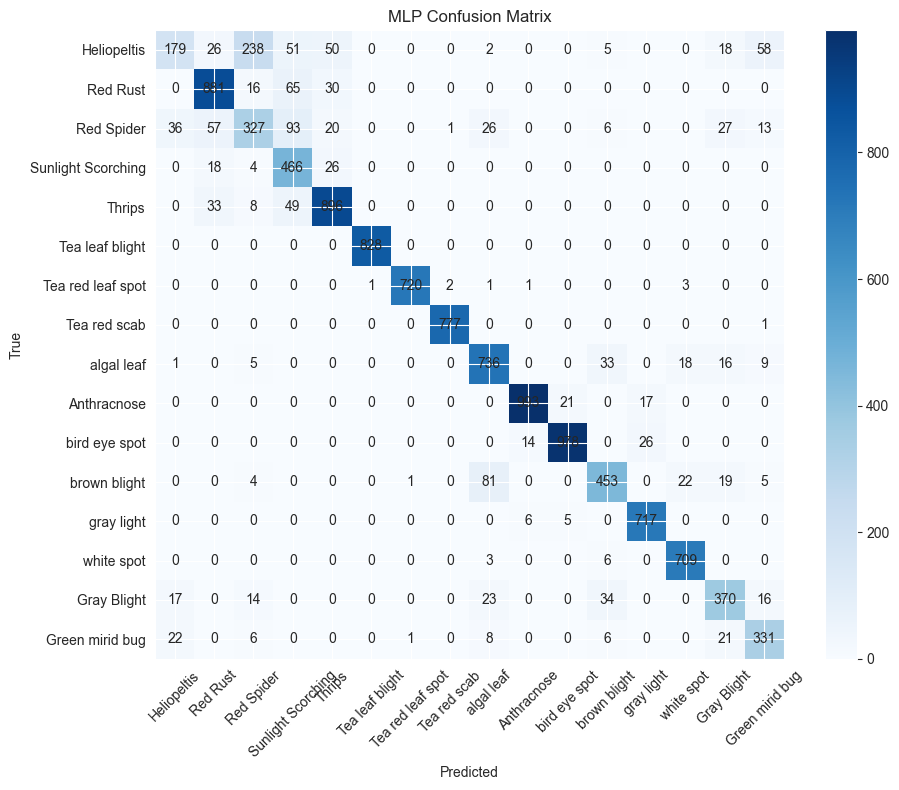

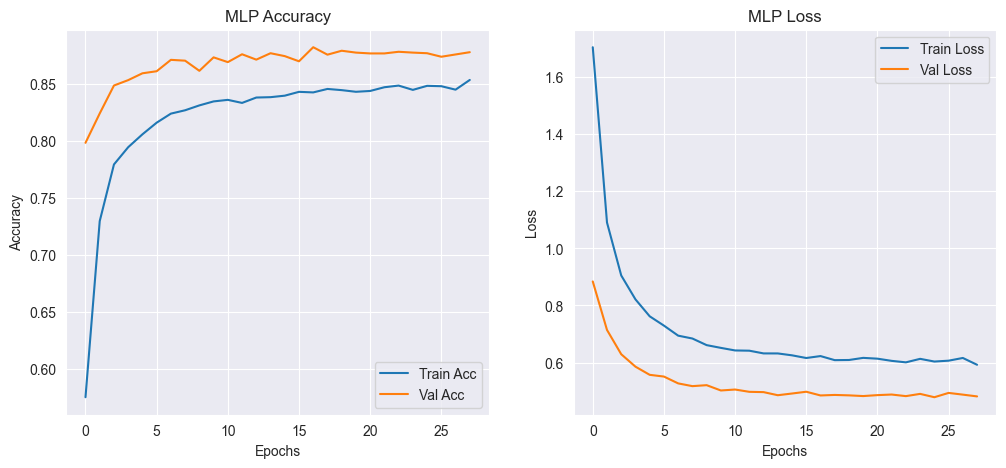

In [3]:
# =========================================================
# Imports
# =========================================================
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# =========================================================
# Load Features & Labels
# =========================================================
DATA_PATH = Path(r'D:\YV\DSGP-IIT\disease and pest detection')

X = np.load(DATA_PATH / 'extracted_features_X.npy')
y = np.load(DATA_PATH / 'extracted_labels_y.npy')
class_map = np.load(DATA_PATH / 'class_mapping.npy', allow_pickle=True).item()

index_to_class = {v: k for k, v in class_map.items()}
class_names = [index_to_class[i] for i in sorted(index_to_class)]
NUM_CLASSES = len(class_names)

print("Feature shape:", X.shape)
print("Number of classes:", NUM_CLASSES)

# =========================================================
# Train / Test Split
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# =========================================================
# Feature Scaling
# =========================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler for inference
joblib.dump(scaler, "mlp_feature_scaler.pkl")

# =========================================================
# One-Hot Encode Labels
# =========================================================
y_train_oh = to_categorical(y_train, NUM_CLASSES)
y_test_oh = to_categorical(y_test, NUM_CLASSES)

# =========================================================
# Handle Class Imbalance
# =========================================================
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# =========================================================
# Build MLP Model
# =========================================================
model = Sequential([
    Dense(
        128, activation='relu',
        kernel_regularizer=regularizers.l2(0.001),
        input_shape=(X_train_scaled.shape[1],)
    ),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

# =========================================================
# Compile
# =========================================================
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# =========================================================
# Callbacks
# =========================================================
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
]

# =========================================================
# Train Model
# =========================================================
history = model.fit(
    X_train_scaled,
    y_train_oh,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    class_weight=class_weights,
    verbose=1
)

# =========================================================
# Evaluate
# =========================================================
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_oh, verbose=0)
print(f"\n✅ MLP Test Accuracy: {test_acc:.4f}")

# =========================================================
# Classification Report
# =========================================================
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=class_names,
    zero_division=0
))

# =========================================================
# Confusion Matrix
# =========================================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()

plt.xticks(range(NUM_CLASSES), class_names, rotation=45, ha='right')
plt.yticks(range(NUM_CLASSES), class_names)

for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()

# =========================================================
# Training Curves
# =========================================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("MLP Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("MLP Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# =========================================================
# Save Model & Metadata
# =========================================================
model.save("mlp_tea_leaf_disease_model.h5")
np.save("mlp_class_names.npy", class_names)

print("\n✅ Model saved as mlp_tea_leaf_disease_model.h5")
print("✅ Scaler saved as mlp_feature_scaler.pkl")


**CNN**

used MobileNetV2 pre trained model

Found 31540 images belonging to 16 classes.
Found 7878 images belonging to 16 classes.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,595,152 (9.90 MB)

 Trainable params: 334,608 (1.28 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

Epoch 1/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6861 - loss: 1.4595
Epoch 1: val_loss improved from None to 0.83706, saving model to mobilenet.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1128s 2s/step - accuracy: 0.7507 - loss: 1.1627 - val_accuracy: 0.8364 - val_loss: 0.8371 - learning_rate: 0.0010
Epoch 2/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8047 - loss: 0.8807
Epoch 2: val_loss improved from 0.83706 to 0.80715, saving model to mobilenet.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1066s 2s/step - accuracy: 0.8081 - loss: 0.8468 - val_accuracy: 0.8156 - val_loss: 0.8071 - learning_rate: 0.0010
Epoch 3/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 931ms/step - accuracy: 0.8190 - loss: 0.7581
Epoch 3: val_loss improved from 0.80715 to 0.72377, saving model to mobilenet.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 535s 1s/step - accuracy: 0.8195 - loss: 0.7460 - val_accuracy: 0.8393 - val_loss: 0.7238 - learning_rate: 0.0010
Epoch 4/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.8214 - loss: 0.7033
Epoch 4: val_loss improved from 0.72377 to 0.70951, saving model to mobilenet.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 485s 984ms/step - accuracy: 0.8235 - loss: 0.6931 - val_accuracy: 0.8390 - val_loss: 0.7095 - learning_rate: 0.0010
Epoch 5/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.8290 - loss: 0.6638
Epoch 5: val_loss improved from 0.70951 to 0.65520, saving model to mobilenet.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 386s 784ms/step - accuracy: 0.8270 - loss: 0.6679 - val_accuracy: 0.8444 - val_loss: 0.6552 - learning_rate: 0.0010
Epoch 6/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8360 - loss: 0.6425
Epoch 6: val_loss did not improve from 0.65520
493/493 ━━━━━━━━━━━━━━━━━━━━ 731s 1s/step - accuracy: 0.8319 - loss: 0.6501 - val_accuracy: 0.8434 - val_loss: 0.6983 - learning_rate: 0.0010
Epoch 7/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8332 - loss: 0.6440
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.

Epoch 7: val_loss did not improve from 0.65520
493/493 ━━━━━━━━━━━━━━━━━━━━ 672s 1s/step - accuracy: 0.8335 - loss: 0.6433 - val_accuracy: 0.8393 - val_loss: 0.6627 - learning_rate: 0.0010
Epoch 8/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8436 - loss: 0.5973
Epoch 8: val_loss improved from 0.65520 to 0.61597, saving model to mobilenet.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 740s 2s/step - accuracy: 0.8488 - loss: 0.5780 - val_accuracy: 0.8465 - val_loss: 0.6160 - learning_rate: 3.0000e-04
Epoch 9/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8563 - loss: 0.5369
Epoch 9: val_loss improved from 0.61597 to 0.58897, saving model to mobilenet.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 925s 2s/step - accuracy: 0.8577 - loss: 0.5300 - val_accuracy: 0.8503 - val_loss: 0.5890 - learning_rate: 3.0000e-04
Epoch 10/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8635 - loss: 0.5052
Epoch 10: val_loss improved from 0.58897 to 0.57083, saving model to mobilenet.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 760s 2s/step - accuracy: 0.8603 - loss: 0.5070 - val_accuracy: 0.8559 - val_loss: 0.5708 - learning_rate: 3.0000e-04
Epoch 11/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8613 - loss: 0.4942
Epoch 11: val_loss did not improve from 0.57083
493/493 ━━━━━━━━━━━━━━━━━━━━ 956s 2s/step - accuracy: 0.8609 - loss: 0.4947 - val_accuracy: 0.8528 - val_loss: 0.5716 - learning_rate: 3.0000e-04
Epoch 12/12
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8705 - loss: 0.4681
Epoch 12: val_loss improved from 0.57083 to 0.55002, saving model to mobilenet.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1069s 2s/step - accuracy: 0.8655 - loss: 0.4780 - val_accuracy: 0.8525 - val_loss: 0.5500 - learning_rate: 3.0000e-04
Restoring model weights from the end of the best epoch: 12.


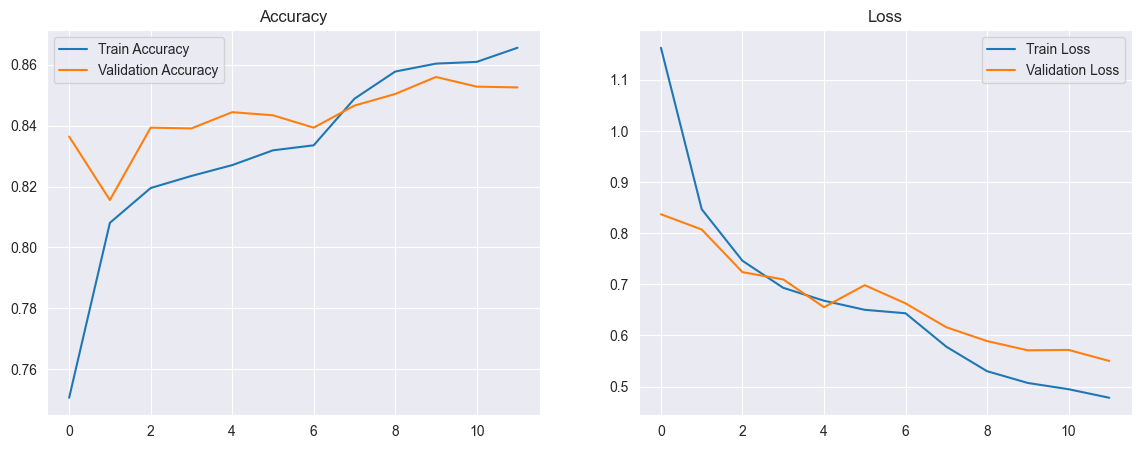

In [4]:
# =========================================================
# Imports
# =========================================================
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# =========================================================
# Configurations (CPU Optimized)
# =========================================================
DATA_PATH = Path(r'D:\YV\DSGP-IIT\disease and pest detection\Augmented_for_ml')

IMG_SIZE = (160, 160)      # Smaller = faster
BATCH_SIZE = 64            # Fewer steps per epoch
EPOCHS = 12                # Shorter training
LEARNING_RATE = 1e-3
VALIDATION_SPLIT = 0.2

# =========================================================
# Data Generators (Stronger Augmentation)
# =========================================================
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=VALIDATION_SPLIT,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=VALIDATION_SPLIT
)

train_gen = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

NUM_CLASSES = train_gen.num_classes

# =========================================================
# Model: MobileNetV2 Backbone (Frozen for Speed)
# =========================================================
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(160, 160, 3)
)

base_model.trainable = False  # IMPORTANT: No fine-tuning for CPU

# Custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# =========================================================
# Compile Model
# =========================================================
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# =========================================================
# Callbacks
# =========================================================
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=2,
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        'mobilenet.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# =========================================================
# Train Model (Head Only)
# =========================================================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks
)

# =========================================================
# Plot Accuracy & Loss
# =========================================================
def plot_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

plot_curves(history)

Model expects input size: 160x160
Found 7878 images belonging to 16 classes.
124/124 ━━━━━━━━━━━━━━━━━━━━ 79s 613ms/step


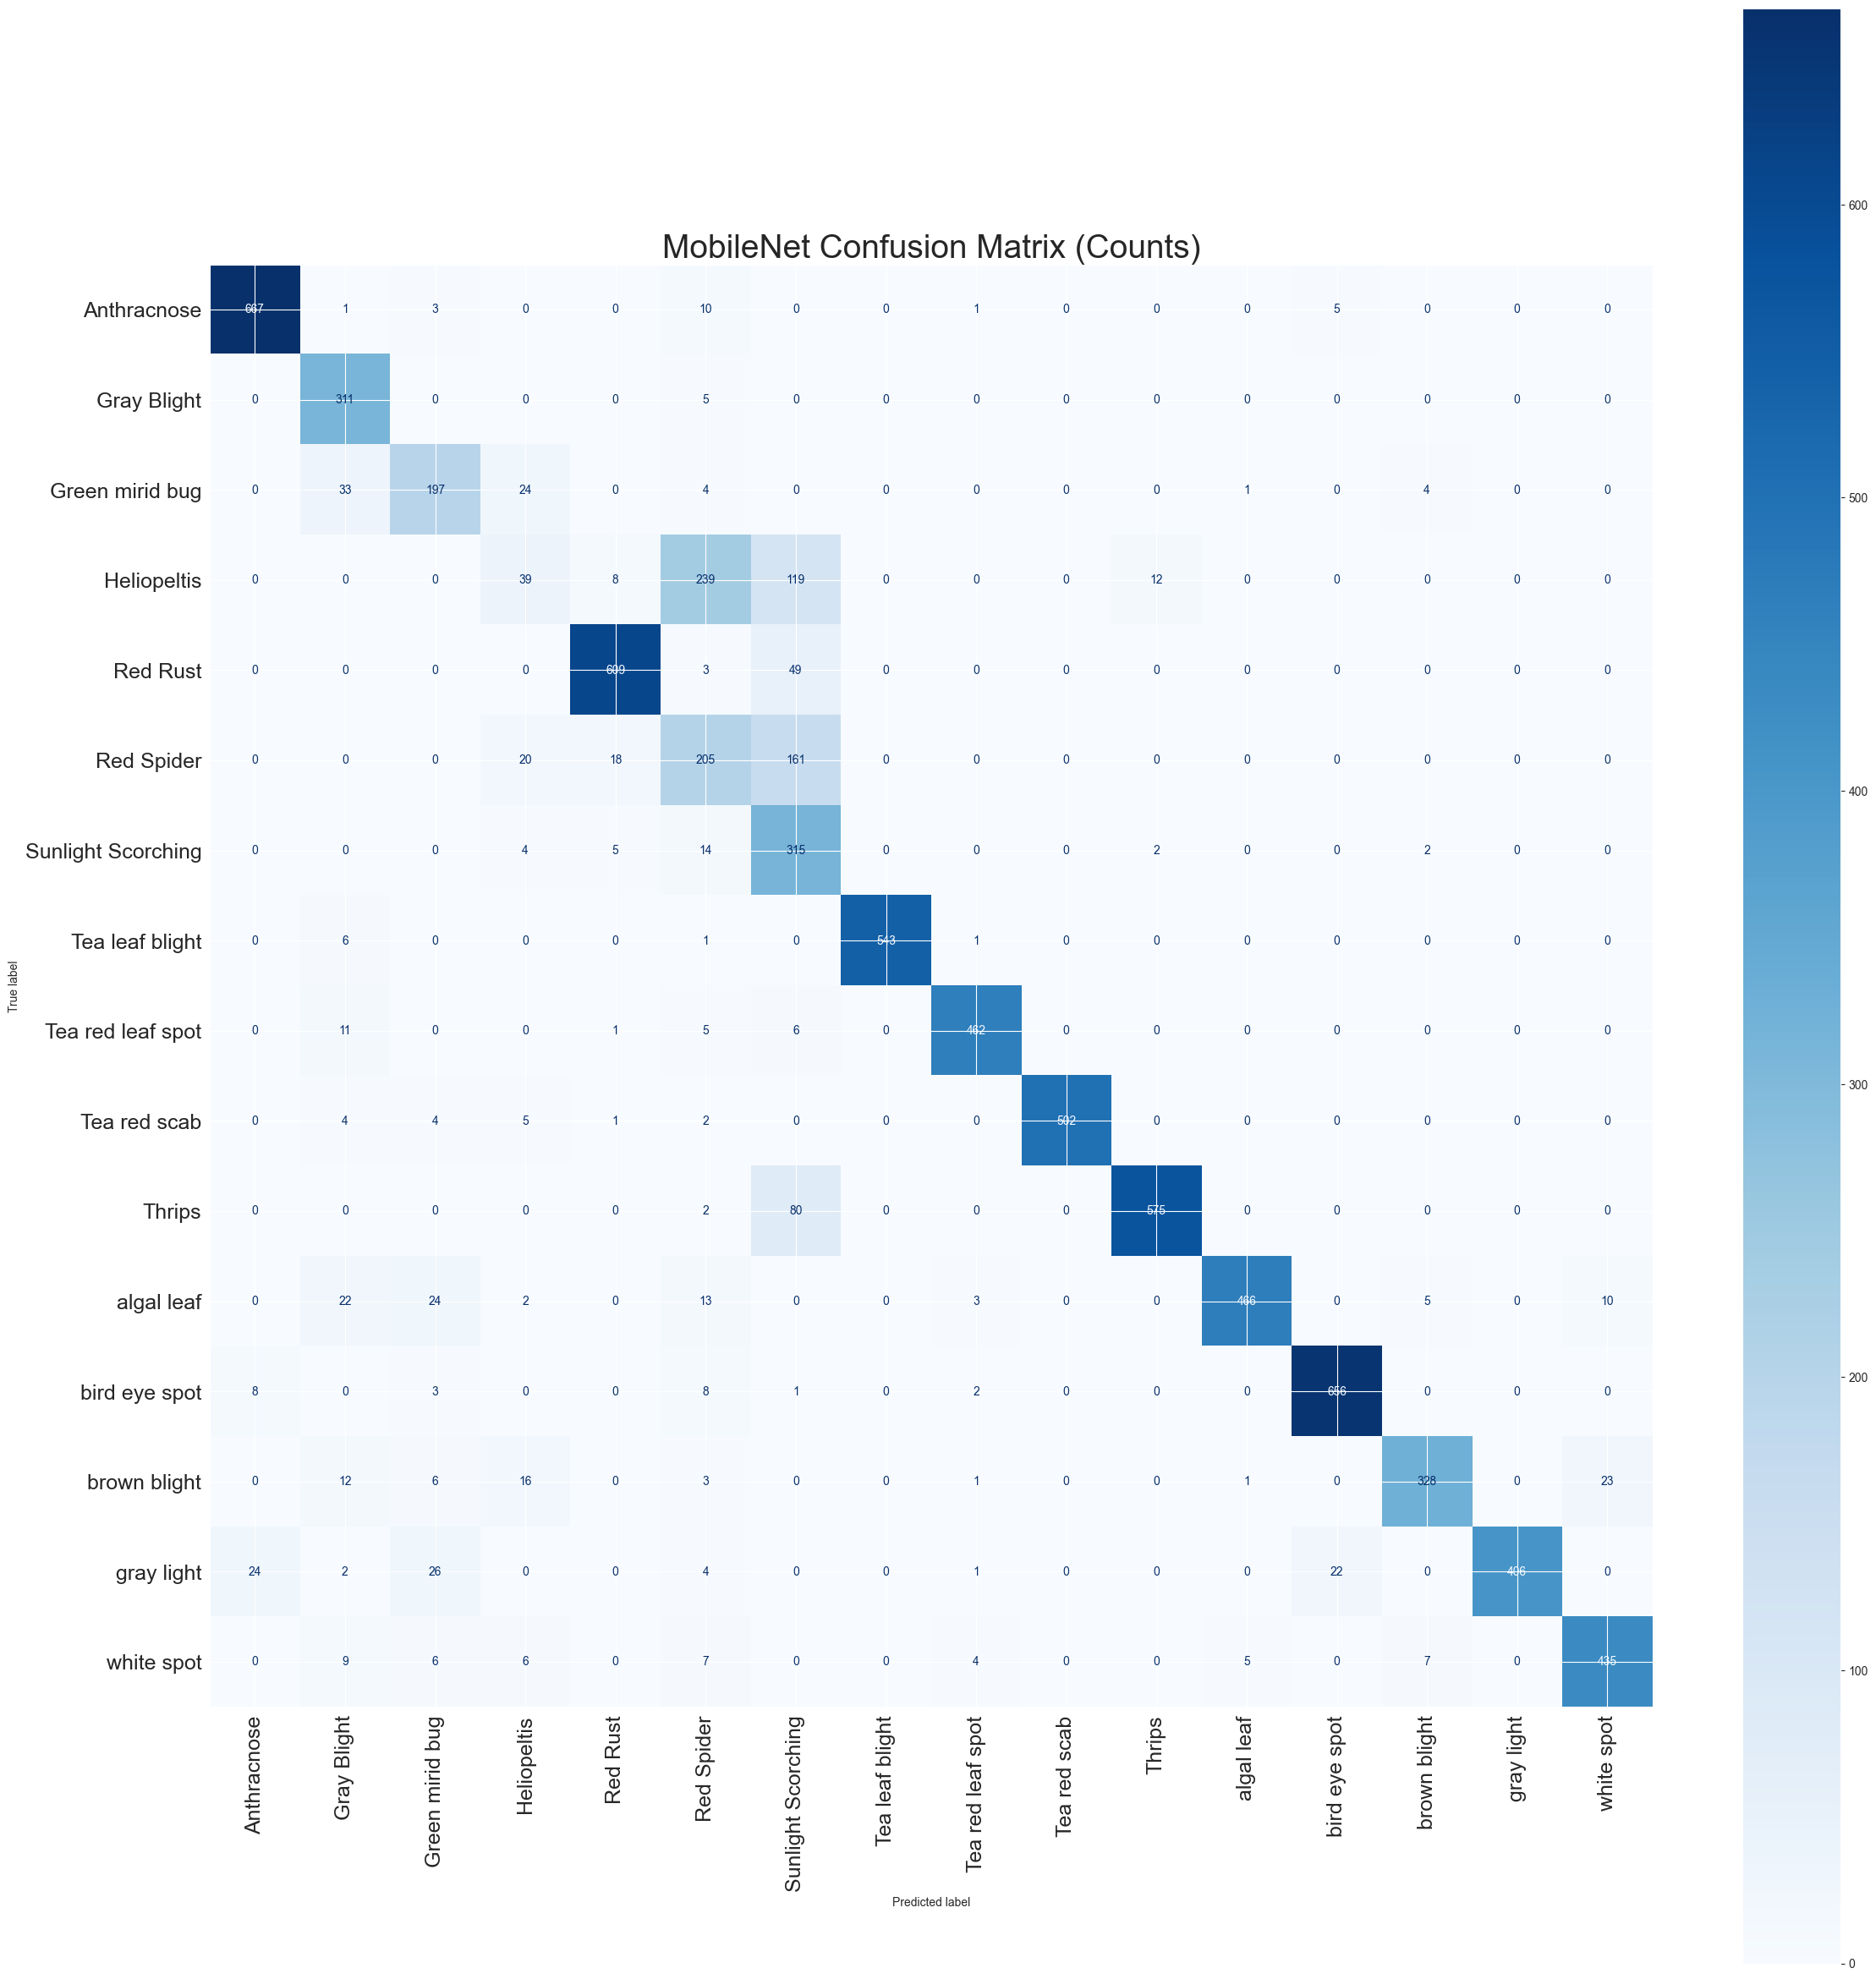

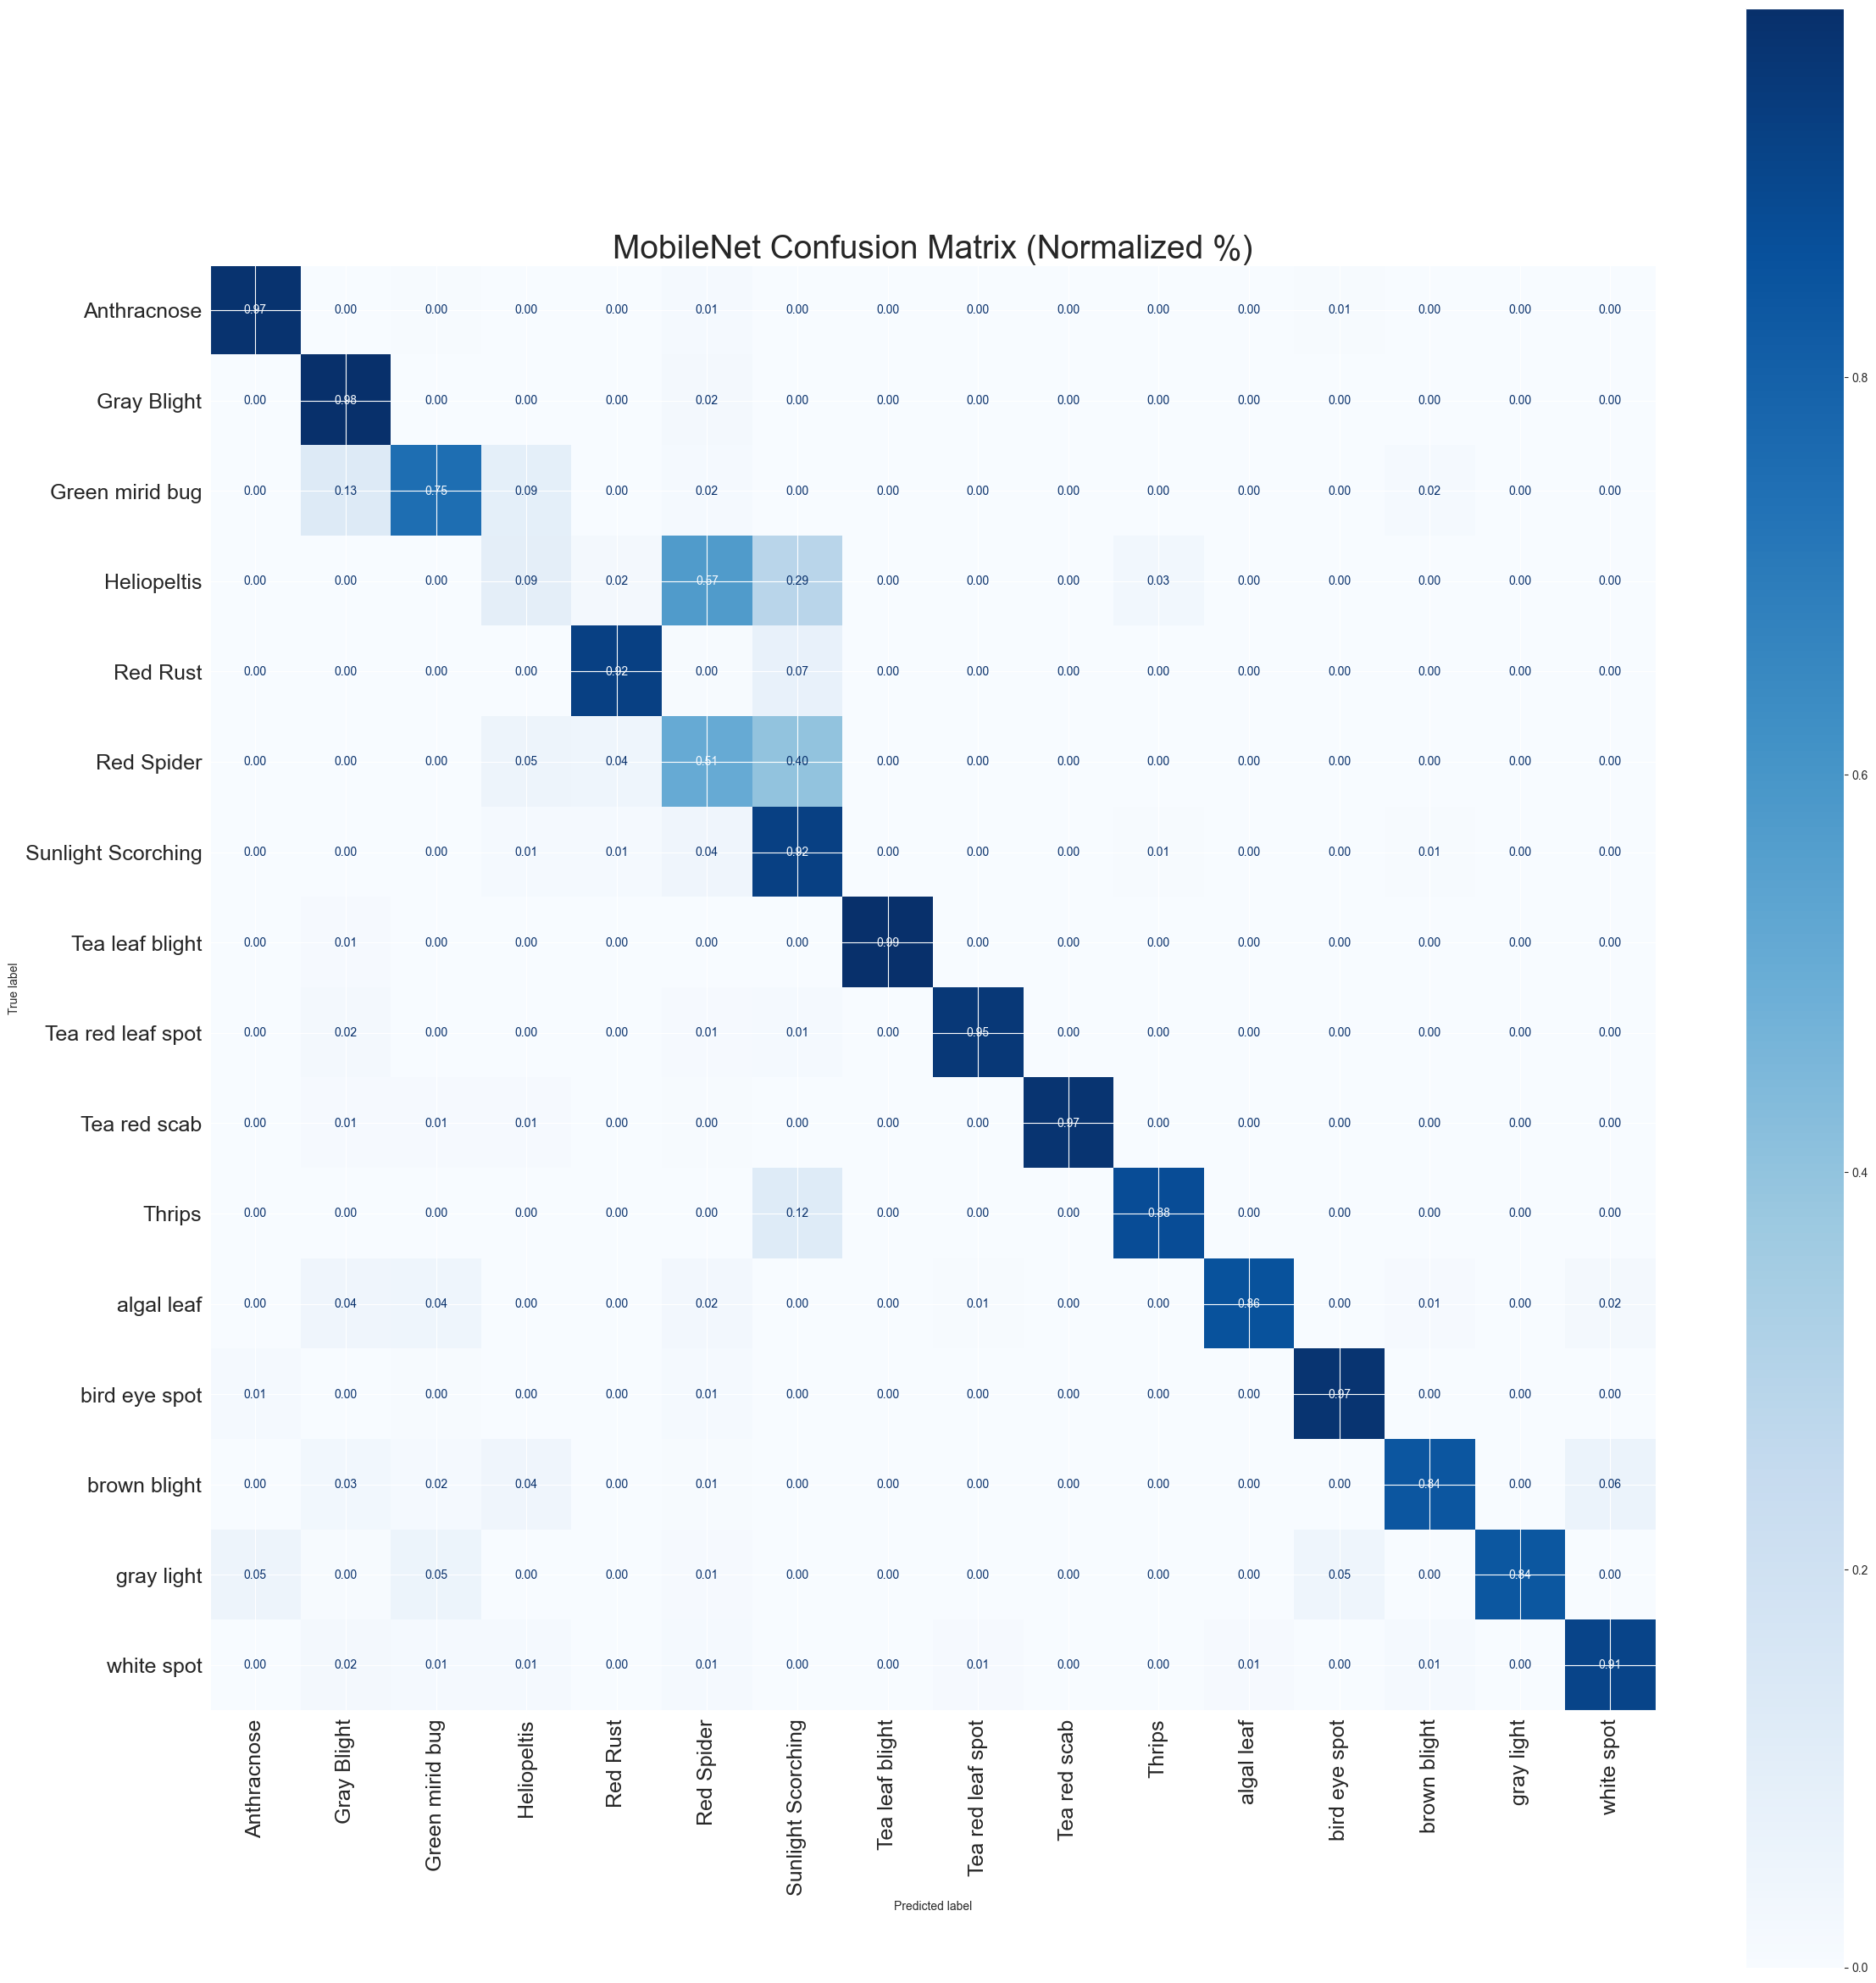

In [11]:
# =========================================================
# CONFUSION MATRIX GENERATOR (LARGER, ONE PER PAGE)
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# =========================================================
# SETTINGS
# =========================================================
DATA_DIR = Path(r"D:\YV\DSGP-IIT\disease and pest detection\Augmented_for_ml")
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.2

# =========================================================
# LOAD MOBILE NET MODEL
# =========================================================
model = tf.keras.models.load_model("mobilenet.h5")

# Get expected input size from model
IMG_HEIGHT, IMG_WIDTH = model.input_shape[1], model.input_shape[2]
print(f"Model expects input size: {IMG_HEIGHT}x{IMG_WIDTH}")

# =========================================================
# CREATE VALIDATION GENERATOR
# =========================================================
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=VALIDATION_SPLIT
)

val_gen = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # match model input
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# =========================================================
# PREDICTIONS
# =========================================================
val_gen.reset()
pred_probs = model.predict(val_gen, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# =========================================================
# CONFUSION MATRICES
# =========================================================
cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# =========================================================
# PLOT: RAW COUNTS
# =========================================================
plt.figure(figsize=(24, 24))  # MUCH larger figure
disp_counts = ConfusionMatrixDisplay(cm, display_labels=class_labels)
disp_counts.plot(
    cmap=plt.cm.Blues,
    xticks_rotation=90,        # rotate x labels for readability
    values_format='d',
    ax=plt.gca()
)
plt.title("MobileNet Confusion Matrix (Counts)", fontsize=28)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

# =========================================================
# PLOT: NORMALIZED PERCENTAGES
# =========================================================
plt.figure(figsize=(24, 24))
disp_norm = ConfusionMatrixDisplay(cm_normalized, display_labels=class_labels)
disp_norm.plot(
    cmap=plt.cm.Blues,
    xticks_rotation=90,
    values_format='.2f',
    ax=plt.gca()
)
plt.title("MobileNet Confusion Matrix (Normalized %)", fontsize=28)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

Use of EfficientNetB0

Found 31540 images belonging to 16 classes.
Found 7878 images belonging to 16 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,387,763 (16.74 MB)

 Trainable params: 335,120 (1.28 MB)

 Non-trainable params: 4,052,643 (15.46 MB)


===== Training Classification Head =====
Epoch 1/8
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5870 - loss: 2.2365
Epoch 1: val_loss improved from None to 1.50237, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1529s 3s/step - accuracy: 0.6904 - loss: 1.8851 - val_accuracy: 0.8077 - val_loss: 1.5024 - learning_rate: 3.0000e-04
Epoch 2/8
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7798 - loss: 1.5796
Epoch 2: val_loss improved from 1.50237 to 1.44302, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1425s 3s/step - accuracy: 0.7886 - loss: 1.5390 - val_accuracy: 0.8059 - val_loss: 1.4430 - learning_rate: 3.0000e-04
Epoch 3/8
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8094 - loss: 1.4373
Epoch 3: val_loss improved from 1.44302 to 1.35912, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1231s 2s/step - accuracy: 0.8115 - loss: 1.4166 - val_accuracy: 0.8275 - val_loss: 1.3591 - learning_rate: 3.0000e-04
Epoch 4/8
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8276 - loss: 1.3460
Epoch 4: val_loss improved from 1.35912 to 1.28304, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1128s 2s/step - accuracy: 0.8280 - loss: 1.3321 - val_accuracy: 0.8332 - val_loss: 1.2830 - learning_rate: 3.0000e-04
Epoch 5/8
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8345 - loss: 1.2772
Epoch 5: val_loss improved from 1.28304 to 1.25648, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1155s 2s/step - accuracy: 0.8364 - loss: 1.2616 - val_accuracy: 0.8324 - val_loss: 1.2565 - learning_rate: 3.0000e-04
Epoch 6/8
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8406 - loss: 1.2172
Epoch 6: val_loss improved from 1.25648 to 1.19473, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1284s 3s/step - accuracy: 0.8439 - loss: 1.2029 - val_accuracy: 0.8472 - val_loss: 1.1947 - learning_rate: 3.0000e-04
Epoch 7/8
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8495 - loss: 1.1600
Epoch 7: val_loss improved from 1.19473 to 1.18397, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1205s 2s/step - accuracy: 0.8501 - loss: 1.1532 - val_accuracy: 0.8368 - val_loss: 1.1840 - learning_rate: 3.0000e-04
Epoch 8/8
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8518 - loss: 1.1257
Epoch 8: val_loss improved from 1.18397 to 1.15947, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1119s 2s/step - accuracy: 0.8513 - loss: 1.1205 - val_accuracy: 0.8371 - val_loss: 1.1595 - learning_rate: 3.0000e-04
Restoring model weights from the end of the best epoch: 8.

===== Fine-Tuning EfficientNet =====
Epoch 1/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7859 - loss: 1.2994
Epoch 1: val_loss did not improve from 1.15947
493/493 ━━━━━━━━━━━━━━━━━━━━ 1382s 3s/step - accuracy: 0.8082 - loss: 1.2339 - val_accuracy: 0.8420 - val_loss: 1.1624 - learning_rate: 1.0000e-05
Epoch 2/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8314 - loss: 1.1612
Epoch 2: val_loss did not improve from 1.15947
493/493 ━━━━━━━━━━━━━━━━━━━━ 1399s 3s/step - accuracy: 0.8360 - loss: 1.1501 - val_accuracy: 0.8436 - val_loss: 1.1682 - learning_rate: 1.0000e-05
Epoch 3/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8472 - loss: 1.1239
Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136253e-06.

Epoch 3: val_loss did not improve f

493/493 ━━━━━━━━━━━━━━━━━━━━ 1316s 3s/step - accuracy: 0.8553 - loss: 1.0995 - val_accuracy: 0.8477 - val_loss: 1.1556 - learning_rate: 3.0000e-06
Epoch 6/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8622 - loss: 1.0896
Epoch 6: val_loss improved from 1.15565 to 1.15487, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 914s 2s/step - accuracy: 0.8630 - loss: 1.0875 - val_accuracy: 0.8487 - val_loss: 1.1549 - learning_rate: 3.0000e-06
Epoch 7/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8615 - loss: 1.0903
Epoch 7: val_loss improved from 1.15487 to 1.14651, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1236s 3s/step - accuracy: 0.8613 - loss: 1.0913 - val_accuracy: 0.8486 - val_loss: 1.1465 - learning_rate: 3.0000e-06
Epoch 8/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8620 - loss: 1.0884
Epoch 8: val_loss improved from 1.14651 to 1.14622, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1326s 3s/step - accuracy: 0.8643 - loss: 1.0837 - val_accuracy: 0.8486 - val_loss: 1.1462 - learning_rate: 3.0000e-06
Epoch 9/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8641 - loss: 1.0803
Epoch 9: val_loss improved from 1.14622 to 1.14310, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1286s 3s/step - accuracy: 0.8659 - loss: 1.0759 - val_accuracy: 0.8486 - val_loss: 1.1431 - learning_rate: 3.0000e-06
Epoch 10/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8656 - loss: 1.0741
Epoch 10: val_loss improved from 1.14310 to 1.14100, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1359s 3s/step - accuracy: 0.8659 - loss: 1.0742 - val_accuracy: 0.8495 - val_loss: 1.1410 - learning_rate: 3.0000e-06
Epoch 11/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8643 - loss: 1.0731
Epoch 11: val_loss did not improve from 1.14100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1020s 2s/step - accuracy: 0.8669 - loss: 1.0689 - val_accuracy: 0.8507 - val_loss: 1.1457 - learning_rate: 3.0000e-06
Epoch 12/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8703 - loss: 1.0640
Epoch 12: val_loss improved from 1.14100 to 1.14078, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 781s 2s/step - accuracy: 0.8695 - loss: 1.0664 - val_accuracy: 0.8505 - val_loss: 1.1408 - learning_rate: 3.0000e-06
Epoch 13/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8720 - loss: 1.0579
Epoch 13: val_loss improved from 1.14078 to 1.13435, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 971s 2s/step - accuracy: 0.8713 - loss: 1.0600 - val_accuracy: 0.8515 - val_loss: 1.1344 - learning_rate: 3.0000e-06
Epoch 14/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8716 - loss: 1.0588
Epoch 14: val_loss did not improve from 1.13435
493/493 ━━━━━━━━━━━━━━━━━━━━ 1302s 3s/step - accuracy: 0.8733 - loss: 1.0586 - val_accuracy: 0.8520 - val_loss: 1.1346 - learning_rate: 3.0000e-06
Epoch 15/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8736 - loss: 1.0547
Epoch 15: val_loss improved from 1.13435 to 1.13127, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1393s 3s/step - accuracy: 0.8723 - loss: 1.0556 - val_accuracy: 0.8521 - val_loss: 1.1313 - learning_rate: 3.0000e-06
Epoch 16/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8744 - loss: 1.0525
Epoch 16: val_loss improved from 1.13127 to 1.12956, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1360s 3s/step - accuracy: 0.8736 - loss: 1.0531 - val_accuracy: 0.8530 - val_loss: 1.1296 - learning_rate: 3.0000e-06
Epoch 17/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8744 - loss: 1.0487
Epoch 17: val_loss improved from 1.12956 to 1.12751, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1387s 3s/step - accuracy: 0.8761 - loss: 1.0464 - val_accuracy: 0.8534 - val_loss: 1.1275 - learning_rate: 3.0000e-06
Epoch 18/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8795 - loss: 1.0412
Epoch 18: val_loss improved from 1.12751 to 1.12400, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 1119s 2s/step - accuracy: 0.8782 - loss: 1.0440 - val_accuracy: 0.8536 - val_loss: 1.1240 - learning_rate: 3.0000e-06
Epoch 19/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8767 - loss: 1.0453
Epoch 19: val_loss did not improve from 1.12400
493/493 ━━━━━━━━━━━━━━━━━━━━ 872s 2s/step - accuracy: 0.8773 - loss: 1.0440 - val_accuracy: 0.8536 - val_loss: 1.1245 - learning_rate: 3.0000e-06
Epoch 20/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8782 - loss: 1.0356
Epoch 20: val_loss improved from 1.12400 to 1.11959, saving model to efficientnet_best.h5


493/493 ━━━━━━━━━━━━━━━━━━━━ 946s 2s/step - accuracy: 0.8786 - loss: 1.0385 - val_accuracy: 0.8534 - val_loss: 1.1196 - learning_rate: 3.0000e-06
Restoring model weights from the end of the best epoch: 20.


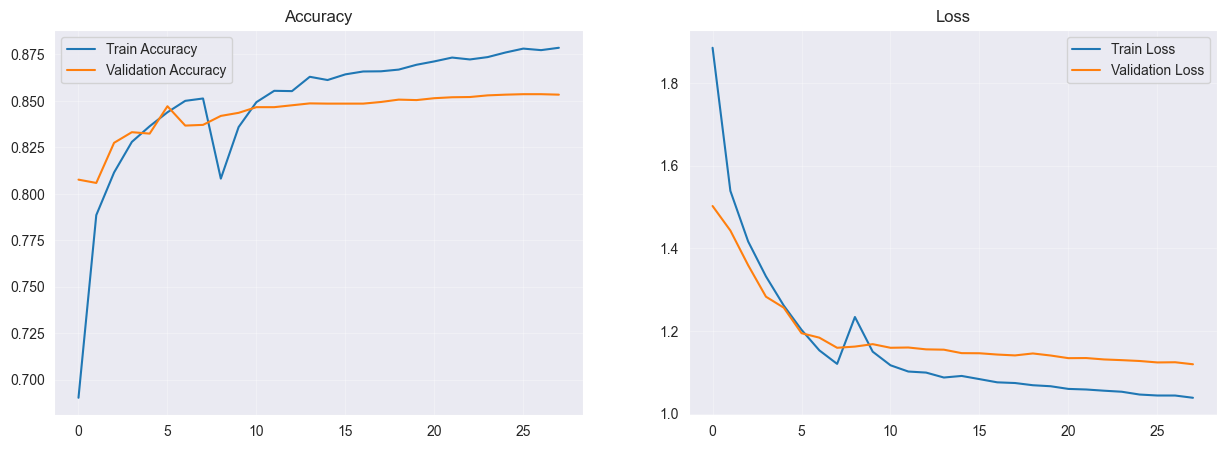

In [1]:
# =========================================================
# Imports
# =========================================================
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2

# =========================================================
# Configurations
# =========================================================
DATA_DIR = Path(r"D:\YV\DSGP-IIT\disease and pest detection\Augmented_for_ml")

IMG_SIZE = (224, 224)
BATCH_SIZE = 64
NUM_CLASSES = 16

EPOCHS_HEAD = 8
EPOCHS_FINE = 20

LEARNING_RATE_HEAD = 3e-4
LEARNING_RATE_FINE = 1e-5

VALIDATION_SPLIT = 0.2

# =========================================================
# Data Generators (CORRECT PREPROCESSING)
# =========================================================
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,   # ⭐ IMPORTANT FIX
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest',
    validation_split=VALIDATION_SPLIT
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=VALIDATION_SPLIT
)

train_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# =========================================================
# Build EfficientNetB0 Model
# =========================================================
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

base_model.trainable = False   # Freeze backbone first

# Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(
    256,
    activation='relu',
    kernel_regularizer=l2(0.001)
)(x)

x = BatchNormalization()(x)
x = Dropout(0.4)(x)

outputs = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# =========================================================
# Compile (Head Training)
# =========================================================
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE_HEAD),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

model.summary()

# =========================================================
# Callbacks
# =========================================================
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),

    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=3,
        min_lr=1e-7,
        verbose=1
    ),

    ModelCheckpoint(
        "efficientnet_best.h5",
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# =========================================================
# TRAIN HEAD ONLY
# =========================================================
print("\n===== Training Classification Head =====")

history_head = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_HEAD,
    callbacks=callbacks
)

# =========================================================
# FINE-TUNING (UNFREEZE TOP LAYERS)
# =========================================================
print("\n===== Fine-Tuning EfficientNet =====")

base_model.trainable = True

# Freeze early layers
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE_FINE),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_FINE,
    callbacks=callbacks
)

# =========================================================
# Plot Training Curves
# =========================================================
def plot_curves(h1, h2):
    acc = h1.history['accuracy'] + h2.history['accuracy']
    val_acc = h1.history['val_accuracy'] + h2.history['val_accuracy']
    loss = h1.history['loss'] + h2.history['loss']
    val_loss = h1.history['val_loss'] + h2.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title("Accuracy")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title("Loss")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.show()

plot_curves(history_head, history_fine)

Loading model...


Found 7878 images belonging to 16 classes.
Predicting...
124/124 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step


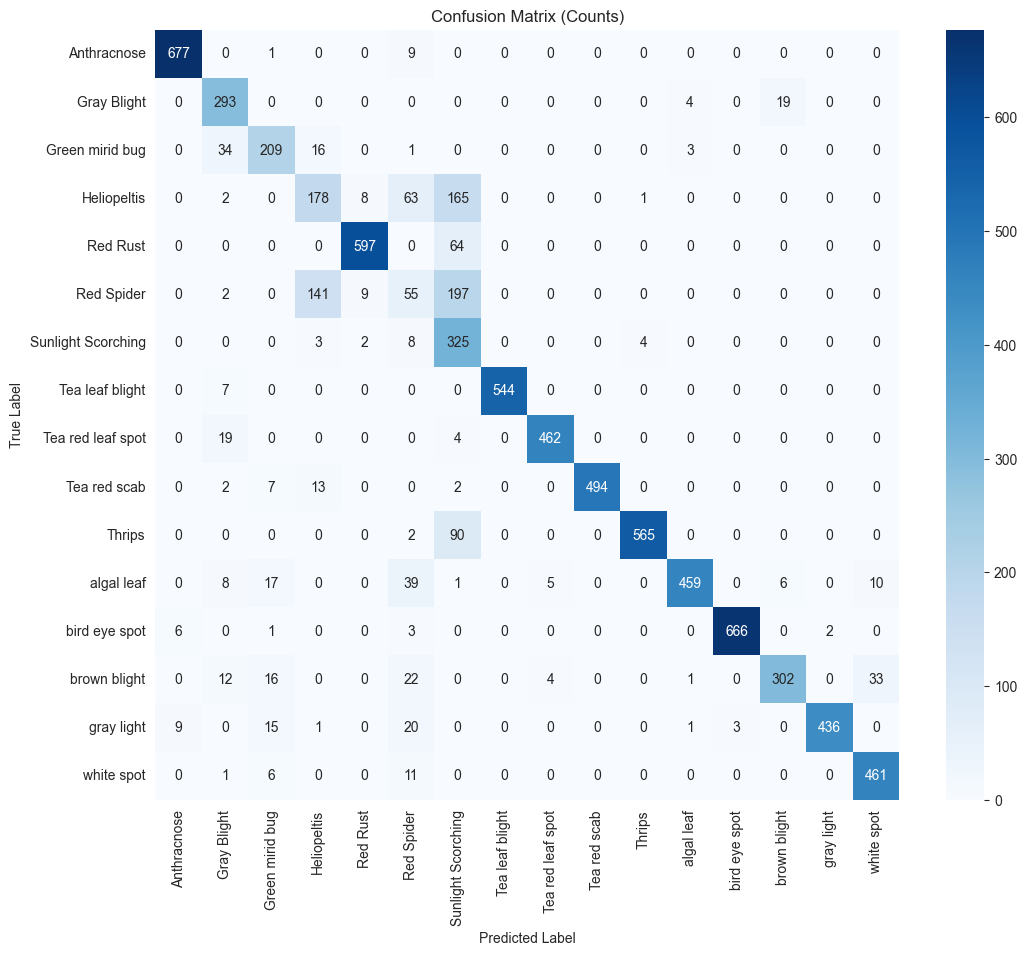

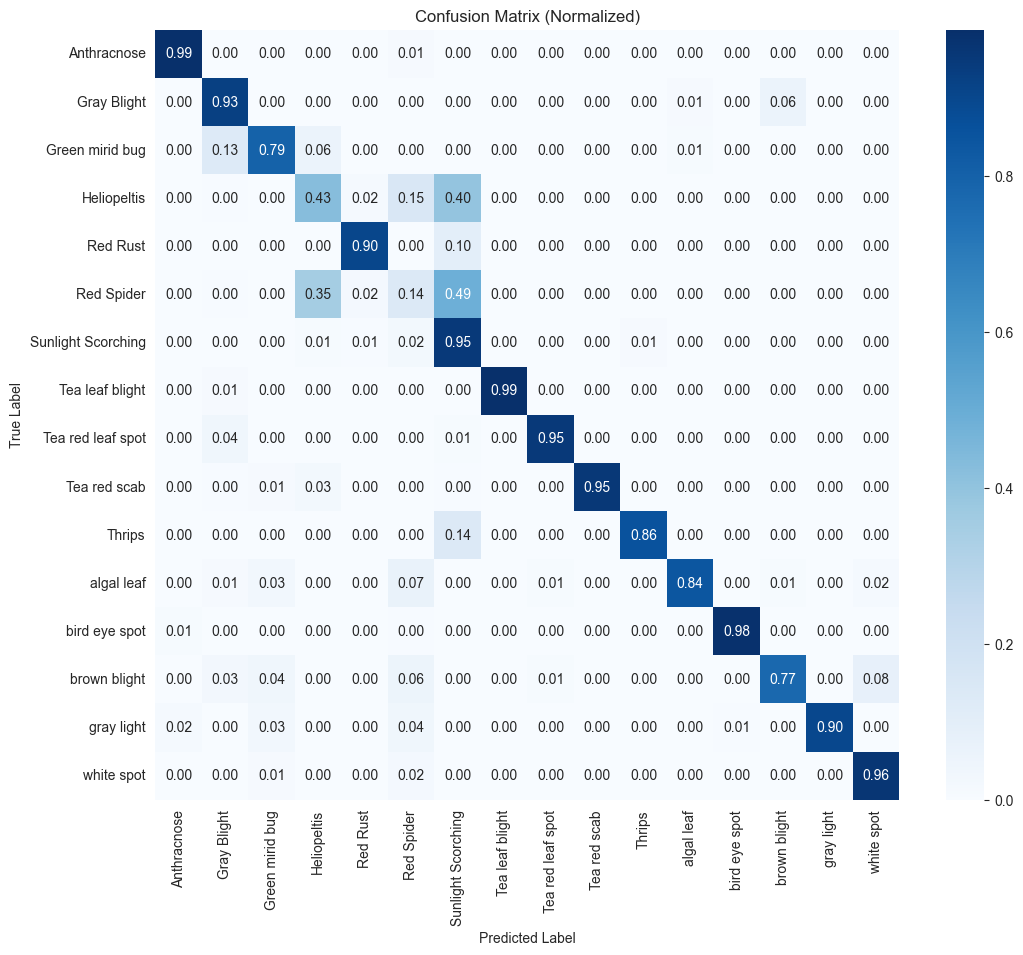

In [6]:
# =========================================================
# CONFUSION MATRICES (COUNT + NORMALIZED)
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

# ---------------------------------------------------------
# SETTINGS (same as training)
# ---------------------------------------------------------
DATA_DIR = Path(r"D:\YV\DSGP-IIT\disease and pest detection\Augmented_for_ml")

IMG_SIZE = (224,224)
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.2

# ---------------------------------------------------------
# LOAD TRAINED MODEL
# ---------------------------------------------------------
print("Loading model...")
model = tf.keras.models.load_model("efficientnet_best.h5")

# ---------------------------------------------------------
# RECREATE VALIDATION GENERATOR
# ---------------------------------------------------------
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=VALIDATION_SPLIT
)

val_gen = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# ---------------------------------------------------------
# PREDICTIONS
# ---------------------------------------------------------
print("Predicting...")
val_gen.reset()

predictions = model.predict(val_gen, verbose=1)
y_pred = np.argmax(predictions, axis=1)

y_true = val_gen.classes
class_names = list(val_gen.class_indices.keys())

# ---------------------------------------------------------
# 1️⃣ COUNT CONFUSION MATRIX
# ---------------------------------------------------------
cm_counts = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(
    cm_counts,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)

plt.title("Confusion Matrix (Counts)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# ---------------------------------------------------------
# 2️⃣ NORMALIZED CONFUSION MATRIX
# ---------------------------------------------------------
cm_normalized = cm_counts.astype('float') / cm_counts.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12,10))
sns.heatmap(
    cm_normalized,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)

plt.title("Confusion Matrix (Normalized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Ensemble

In [ ]:
# =========================================================
# Imports
# =========================================================
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

# =========================================================
# Config
# =========================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATA_DIR = Path(r"D:\YV\DSGP-IIT\disease and pest detection\Augmented_for_ml")

# =========================================================
# Load Image Models
# =========================================================
mobilenet_model = load_model("mobilenetv2_best_gap_reduced_model.h5")
efficient_model = load_model("best_model.h5")  # EfficientNetB0 fine-tuned

# =========================================================
# Image Data Generator for Validation
# =========================================================
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_gen = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# =========================================================
# Predict Probabilities for Image Models
# =========================================================
mobilenet_preds = mobilenet_model.predict(val_gen, verbose=1)
efficient_preds = efficient_model.predict(val_gen, verbose=1)

# =========================================================
# Load MLP Model and Scaler
# =========================================================
mlp_model = load_model("mlp_tea_leaf_disease_model.h5")
scaler = joblib.load("mlp_feature_scaler.pkl")

# =========================================================
# Load feature dataset for validation
# =========================================================
import os

# Suppose you have pre-extracted features for validation split
X = np.load(DATA_DIR.parent / "extracted_features_X.npy")
y = np.load(DATA_DIR.parent / "extracted_labels_y.npy")
class_map = np.load(DATA_DIR.parent / "class_mapping.npy", allow_pickle=True).item()
NUM_CLASSES = len(class_map)
index_to_class = {v: k for k, v in class_map.items()}
class_names = [index_to_class[i] for i in sorted(index_to_class)]

# Split features to match validation split (20%)
split_idx = int(len(X) * 0.8)
X_val = X[split_idx:]
y_val = y[split_idx:]

# Scale features
X_val_scaled = scaler.transform(X_val)

# Predict probabilities from MLP
mlp_preds = mlp_model.predict(X_val_scaled)

# =========================================================
# Ensemble: Average Probabilities (Soft Voting)
# =========================================================
# Align shapes
min_len = min(len(mobilenet_preds), len(efficient_preds), len(mlp_preds))
mobilenet_preds = mobilenet_preds[:min_len]
efficient_preds = efficient_preds[:min_len]
mlp_preds = mlp_preds[:min_len]
y_val = y_val[:min_len]

ensemble_preds = (mobilenet_preds + efficient_preds + mlp_preds) / 3
y_pred = np.argmax(ensemble_preds, axis=1)

# =========================================================
# Evaluation
# =========================================================
print("\nClassification Report (Ensemble):")
print(classification_report(y_val, y_pred, target_names=class_names, zero_division=0))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(12,10))
plt.imshow(cm, cmap='Blues')
plt.title("Ensemble Confusion Matrix")
plt.colorbar()
plt.xticks(range(NUM_CLASSES), class_names, rotation=45, ha='right')
plt.yticks(range(NUM_CLASSES), class_names)
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm[i,j], ha='center', va='center')
plt.tight_layout()
plt.show()
